<a href="https://colab.research.google.com/github/Moukthika1253/Reddit-comments-text-classifier/blob/main/SubReddit_category_text_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading dataset**

In [2]:
import pandas as pd
post_df=pd.read_csv('/content/Top_Posts.csv')
comment_df=pd.read_csv('/content/Top_Posts_Comments.csv')

In [3]:
post_df.head()

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,https://v.redd.it/25nxi9ojfha61,Discussion,5851,133,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,https://v.redd.it/rlmmjm1q5wu41,Research,4761,111,0.97,2020-04-25 04:27:23,2020
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,https://v.redd.it/ikd5gjlbi8k61,News,4688,230,0.97,2021-02-28 15:12:28,2021
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,https://i.redd.it/34sgziebfia71.jpg,Discussion,4568,228,0.96,2021-07-11 04:18:59,2021


In [4]:
comment_df.head()

,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,The future 🤯
2,gh1dj9,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,Ohh the nightmare of making this into a stable...


In [5]:
post_comment_df=pd.merge(post_df,comment_df,how='inner',on='post_id')
post_comment_df.head()

,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,The future 🤯
2,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Ohh the nightmare of making this into a stable...


In [6]:
target_df=post_comment_df[['subreddit','comment']]
target_df.head()

,subreddit,comment
0,MachineLearning,Twitter thread: [https://twitter.com/cyrildiag...
1,MachineLearning,The future 🤯
2,MachineLearning,Simple yet very useful. Thank you for sharing ...
3,MachineLearning,"Almost guaranteed, Apple will copy your idea i..."
4,MachineLearning,Ohh the nightmare of making this into a stable...


**Split into Train, Dev, Test dataset**

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_remaining, y_train, y_remaining= train_test_split(target_df['comment'],target_df['subreddit'],train_size=0.5,stratify=target_df['subreddit'])
X_dev, X_test, y_dev, y_test = train_test_split(X_remaining,y_remaining,test_size=0.3,stratify=y_remaining)
train_set=pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
dev_set=pd.concat([X_dev,y_dev],axis=1).reset_index(drop=True)
test_set=pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
print(f"Train set size:  ",train_set.size)
print(f"Dev set size:  ",dev_set.size)
print(f"Test set size:  ",test_set.size)

Train set size:   223168
Dev set size:   156216
Test set size:   66952


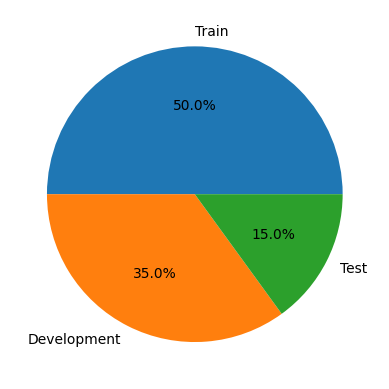

In [14]:
from matplotlib.pyplot import pie,show
import pandas as pd
datasplit=['Train', 'Development','Test']
size=[train_set.size,dev_set.size,test_set.size]
pie(size,labels=datasplit,autopct='%.1f%%')
show()


In [15]:
train_set.head()

,comment,subreddit
0,you might be referring to Tycho maybe. Kepler ...,datascience
1,">No, I don't want to prevent people from apply...",datascience
2,Neuromorphic sounds cool. I'm curious how it s...,MachineLearning
3,Maybe but most of the levels.fyi data also has...,datascience
4,Imagine getting a blowjob by an AI trained by ...,datascience


**Deleting empty comments**

In [8]:
import numpy as np
train_set.isna().sum()

comment      6
subreddit    0
dtype: int64

In [9]:
train_set['comment'].replace('',np.nan,inplace=True)
train_set.dropna(subset=['comment'],inplace=True)
train_set.isna().sum()


comment      0
subreddit    0
dtype: int64

In [10]:
train_copy=train_set.copy()
train_copy.head()

,comment,subreddit
0,Firstly... why? Whats the value they see in it...,datascience
1,can your code train the same neuron network?,MachineLearning
2,Would be better if more authors published thei...,MachineLearning
3,Direct link: [https://aws.amazon.com/training...,artificial
4,The idea of modeling in Bayesian networks and ...,datascience


**Pre-processing**

**Removing empty rows**

In [11]:
dev_set.isna().sum()

comment      1
subreddit    0
dtype: int64

In [12]:
import numpy as np
dev_set.replace('',np.nan,inplace=True)
dev_set.dropna(inplace=True)
dev_set.isna().sum()

comment      0
subreddit    0
dtype: int64

In [13]:
test_set.isna().sum()

comment      2
subreddit    0
dtype: int64

In [14]:
test_set.replace('',np.nan,inplace=True)
test_set.dropna(inplace=True)
test_set.isna().sum()

comment      0
subreddit    0
dtype: int64

In [15]:
import string,re
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def text_preprocess(comment):
  tokens=[word for word in word_tokenize(comment)]
  tokens1=[word.lower() for word in tokens if word.lower() not in stopwords.words('english')]
  for i in range(len(tokens1)):
   tokens1[i]= ''.join([word for word in tokens1[i] if word not in (string.punctuation)])
  tokens2=[word for word in tokens1 if word]
  tokens3=[re.sub(r'\s\s+','',word) for word in tokens2]
  word_lem=WordNetLemmatizer()
  lem_words=[word_lem.lemmatize(word) for word in tokens3]
  return lem_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train_copy['comment']=train_copy['comment'].apply(text_preprocess)
train_copy.head()

,comment,subreddit
0,"[firstly, whats, value, see, business]",datascience
1,"[code, train, neuron, network]",MachineLearning
2,"[would, better, author, published, code, grad,...",MachineLearning
3,"[direct, link, http, awsamazoncomtraininglearn...",artificial
4,"[idea, modeling, bayesian, network, machine, l...",datascience


In [25]:
text_preprocess("Likely, and it will be easier for them, the processing could be done in the iPhone and uploading can be done through airdrop (which supports 'aiming' at people and machines to share files).")

['likely',
 'easier',
 'processing',
 'could',
 'done',
 'iphone',
 'uploading',
 'done',
 'airdrop',
 'support',
 'aiming',
 'people',
 'machine',
 'share',
 'file']

**Calculating total number of words in all comments**

In [17]:
word_list=[]
for comment in train_copy['comment']:
  for word in comment:
    word_list.append(word)
word_list= list(set(word_list))
total=len(word_list)
print(f'total number of words in vocabulary: {total}')

total number of words in vocabulary: 86019


In [18]:
from collections import defaultdict
AI_category=0
ML_category=0
DataScience_category=0
num_AI_words=0
num_ML_words=0
num_Datasci_words=0
AI_words=[]
ML_words=[]
DS_words=[]
word_dict=defaultdict(lambda:[0,0,0])
category=list(train_copy['subreddit'])

**Calculating word frequencies of each word in every comment**

In [19]:
for i, comment in enumerate(list(train_copy['comment'])):
  if  category[i] == 'artificial':
    AI_category=AI_category+1
  elif category[i] == 'MachineLearning':
    ML_category=ML_category+1
  else:
    DataScience_category=DataScience_category+1
  for word in (comment):
    if category[i] == 'artificial':
      word_dict[word][0]+=1
      AI_words.append(word)
      num_AI_words+=1 
    elif category[i] == 'MachineLearning':
      word_dict[word][1]+=1
      ML_words.append(word)
      num_ML_words+=1
    else:
      word_dict[word][2]+=1
      DS_words.append(word)
      num_Datasci_words+=1

In [20]:
word_dict

defaultdict(<function __main__.<lambda>()>,
            {'firstly': [2, 17, 23],
             'whats': [14, 26, 53],
             'value': [118, 948, 1724],
             'see': [649, 3618, 3008],
             'business': [91, 587, 2679],
             'code': [255, 2661, 2772],
             'train': [129, 960, 330],
             'neuron': [79, 317, 43],
             'network': [325, 2029, 520],
             'would': [1594, 8457, 7480],
             'better': [490, 2664, 2954],
             'author': [38, 894, 176],
             'published': [38, 557, 140],
             'grad': [14, 205, 608],
             'student': [54, 925, 849],
             'could': [863, 4241, 3355],
             'try': [244, 1502, 1618],
             'replicate': [11, 100, 30],
             'finding': [33, 308, 457],
             'nt': [2656, 15022, 14952],
             'publishing': [12, 255, 46],
             'conference': [11, 502, 98],
             'norm': [7, 103, 83],
             'computer': [274, 1026, 773

In [21]:
word_dict_copy=word_dict.copy()
count=0
for i, (k,v) in enumerate(word_dict_copy.items()):
  if (v[0]<4 and v[1]<4 and v[2]<4):
    del(k)
    count+=1

In [22]:
print(f"Total number of rare words: {count}")

Total number of rare words: 67721


In [23]:
no_rarewords=total-count
print(f'Total number of words after removing rarewords: {no_rarewords}')

Total number of words after removing rarewords: 18298


# Probability Calculation

**P(Artificial Intelligence), P(Machine Learning), P(Data Science)**

In [40]:
prob_AI=train_copy['subreddit'].value_counts(normalize=True)['artificial']
prob_ML=train_copy['subreddit'].value_counts(normalize=True)['MachineLearning']
prob_DS=train_copy['subreddit'].value_counts(normalize=True)['datascience']
print(f"P(Artificial Intelligence) = {prob_AI} P(Machine Learning) = {prob_ML} P(Data Science) = {prob_DS}")

P(Artificial Intelligence) = 0.09100034055672061 P(Machine Learning) = 0.4288415694287609 P(Data Science) = 0.4801580900145185


**P(Artificial Intelligence|word), P(Machine Learning|word), P(Datas Science|word)**

In [41]:
import math
features=1 #feature=comments
def cond_prob(category,word,alpha):
  if alpha == 'no':
   if category == 'artificial':
    return math.log(word_dict[word][0]/num_AI_words)
   elif category == 'MachineLearning':
    return math.log(word_dict[word][1]/num_ML_words)
   else:
    return math.log(word_dict[word][2]/num_Datasci_words)
  else:
    if category == 'artificial':
     return math.log(word_dict[word][0]+alpha/num_AI_words+features*alpha)
    elif category == 'MachineLearning':
     return math.log(word_dict[word][1]+alpha/num_ML_words+features*alpha)
    else:
     return math.log(word_dict[word][2]/num_Datasci_words+features*alpha)

In [48]:
print("With no alpha P(word=forward|Artificial Intelligence) = ",cond_prob('artificial','forward','no'))

With no alpha P(word=forward|Artificial Intelligence) =  -8.077732931192894


In [49]:
print("With no alpha P(word=forward|Machine Learning) = ",cond_prob('MachineLearning','forward','no'))

With no alpha P(word=forward|Machine Learning) =  -8.038448439324501


In [50]:
print("With no alpha P(word=forward|Data Science) = ",cond_prob('datascience','forward','no'))

With no alpha P(word=forward|Data Science) =  -8.50433895892507


Among the three probablities, Prob is higher for category=Machine Learning therefore the word 'forward' belongs to MachineLearning category

**Calculating Probability where evidence = comment, hypothesis=subreddit category P(Artificial Intelligence|comment), P(Machine Learning|comment), P(Data Science|comment)**

In [51]:
def comment_probability(category, comment,alpha):
  if category == 'artificial':
    prob=math.log(AI_category/len(train_copy))
  elif category == 'MachineLearning':
    prob=math.log(ML_category/len(train_copy))
  else:
    prob=math.log(DataScience_category/len(train_copy))
  preprocessed_comments=[]
  preprocessed_comments=text_preprocess(comment)
  for word in preprocessed_comments:
     prob=prob+cond_prob(category,word,alpha)
  return prob

**Predicting class**

In [52]:
def predict_class(comment,alpha):
 if (comment_probability('artificial',comment,alpha)*prob_AI > comment_probability('MachineLearning',comment,alpha)*prob_ML) and (comment_probability('artificial',comment,alpha)*prob_AI > comment_probability('datascience',comment,alpha)*prob_DS):
   return "artificial"
 elif (comment_probability('MachineLearning',comment,alpha)*prob_ML > comment_probability('artificial',comment,alpha)*prob_AI) and (comment_probability('MachineLearning',comment,alpha)*prob_ML > comment_probability('datascience',comment,alpha)*prob_DS):
    return "MachineLearning"
 else:
    return "datascience"

**probability of a comment and class prediction**

In [53]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.','no'))

ValueError: ignored

**Original Category**

In [54]:
print(post_comment_df.query('comment=="This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits."')['subreddit'])

252    MachineLearning
Name: subreddit, dtype: object


**Predicted category**

In [55]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',0.5))

54.27159209321105


In [56]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',0.5)

'MachineLearning'

In [57]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1))

55.33008184846226


In [58]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1)

'MachineLearning'

In [59]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',10))

62.116185968456676


In [60]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',10)

'MachineLearning'

In [61]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',100))

78.31787415300964


In [62]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',100)

'MachineLearning'

In [63]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1000))

104.22358780980413


In [64]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',1000)

'datascience'

In [65]:
print(comment_probability('artificial','This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',5000))

126.19542849731612


In [66]:
predict_class('This system ended up deployed in banks to parse written checks, so I don\'t think it was tweaked just for these examples, but they did expect to have fully visible digits.',5000)

'datascience'

If we observe the probabilities, the highest probability is achieved when alpha=5000, but wif we observe the class prediction, it is wrong when alpha is both 1000 and 5000. This means the hyperparameter tuning didnt work when alpha is 1000 and 5000

**Calculating accuracy on Dev set**

In [67]:
def create_dict(df):
 for i, comment in enumerate(list(df)):
  if  category[i] == 'artificial':
    AI_category=AI_category+1
  elif category[i] == 'MachineLearning':
    ML_category=ML_category+1
  else:
    DataScience_category=DataScience_category+1
  for word in (comment):
    if category[i] == 'artificial':
      word_dict[word][0]+=1
      AI_words.append(word)
      num_AI_words+=1 
    elif category[i] == 'MachineLearning':
      word_dict[word][1]+=1
      ML_words.append(word)
      num_ML_words+=1
    else:
      word_dict[word][2]+=1
      DS_words.append(word)
      num_Datasci_words+=1
    return word_dict

In [68]:
def find_accuracy(alpha):
 correct_pred=0
 incorrect_pred=0
 subreddit=list(dev_set['subreddit'])
 for i, comment in enumerate(list(dev_set['comment'])):
   if predict_class(comment,alpha) == subreddit[i]:
    correct_pred+=1
   else:
    incorrect_pred+=1
 return (f"Accuracy when alpha is {alpha}= {correct_pred/(correct_pred+incorrect_pred)}")

**Alpha = 1**

In [70]:
find_accuracy(1)

'Accuracy when alpha is 1= 0.42682645770914956'

**Alpha=100**

In [71]:
find_accuracy(100)

'Accuracy when alpha is 100= 0.4322680597167806'

**comparision of Laplace Smoothing**

<Axes: >

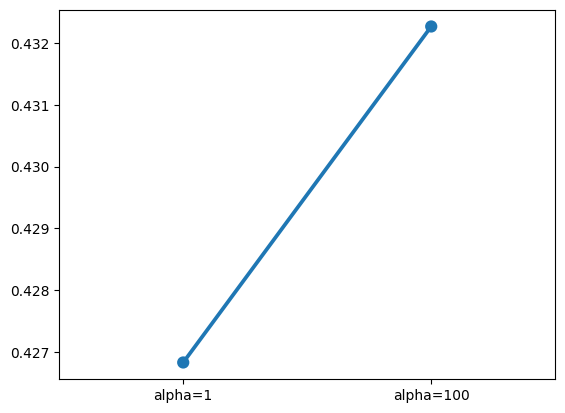

In [76]:
import seaborn as sns
acc=[0.42682645770914956,0.4322680597167806]
label=['alpha=1','alpha=100']
sns.pointplot(data=None,x=label,y=acc)

Among all the accuracies, the accuracy is higher for alpha = 100. Therefore, I will use alpha= 100 for finding the accuracy of test dataset

**Test Accuracy**

In [ ]:
def test_accuracy(alpha):
 correct_pred=0
 incorrect_pred=0
 subreddit=list(test_set['subreddit'])
 for i, comment in enumerate(list(test_set['comment'])):
   if predict_class(comment,alpha) == subreddit[i]:
    correct_pred+=1
   else:
    incorrect_pred+=1
 return (f"Accuracy when alpha is {alpha}= {correct_pred/(correct_pred+incorrect_pred)}")

In [ ]:
test_accuracy(100)

'Accuracy when alpha is 100= 0.43279091502682215'

<Axes: >

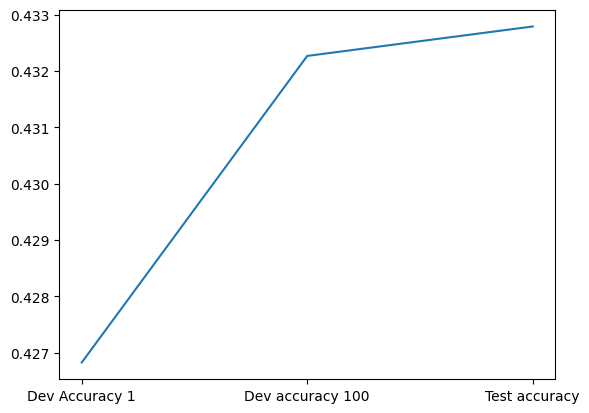

In [75]:
acc=[0.42682645770914956,0.4322680597167806,0.43279091502682215]
label=['Dev Accuracy 1','Dev accuracy 100','Test accuracy']
sns.lineplot(data=None,x=label,y=acc)

**KNN Text classifier**

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_remaining, y_train, y_remaining= train_test_split(train_set['comment'],train_set['subreddit'],train_size=0.5,stratify=train_set['subreddit'])
X_test, X_dev, y_test, y_dev = train_test_split(X_remaining,y_remaining,test_size=0.3,stratify=y_remaining)
train_set=pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
dev_set=pd.concat([X_dev,y_dev],axis=1).reset_index(drop=True)
test_set=pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
print(f"Train set size:  ",train_set.size)
print(f"Dev set size:  ",dev_set.size)
print(f"Test set size:  ",test_set.size)

Train set size:   111582
Dev set size:   33476
Test set size:   78106


In [79]:
knn_train=train_set.copy()
knn_train

,comment,subreddit
0,Also the process of creation for the vast majo...,MachineLearning
1,Oh yes ofc. I mean it's hilarious for me (us) ...,datascience
2,Given a large enough blender and a hydraulic p...,datascience
3,"So according to their blog post, you are right...",MachineLearning
4,[deleted],MachineLearning
...,...,...
55786,It’s Fusilli Jerry!,MachineLearning
55787,[deleted],artificial
55788,Google sells the result of their models in GCP...,MachineLearning
55789,"Eh, I'd say that depends on how dangerous a ty...",datascience


In [81]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(knn_train['comment'])
# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)
# training our classifier ; train_data.target will be having numbers assigned for each category in train data
clf = knn.fit(X_train_tfidf, knn_train['subreddit'])
# Input Data to predict their classes of the given categories
docs_new = ['There is a new blog post with more details at  [https://ml-jku.github.io/hopfield-layers/](https://ml-jku.github.io/hopfield-layers/)', 'This is the best answer I have gotten so far! I am going to try this out! So as a data person it may be possible to rise in an organization if they are serious about the investments.']
# building up feature vector of our input
X_new_counts = count_vect.transform(docs_new)
# We call transform instead of fit_transform because it's already been fit
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [83]:
predicted = clf.predict(X_new_tfidf)
for i in range(len(predicted)):
    print((docs_new[i], predicted[i]))

('There is a new blog post with more details at  [https://ml-jku.github.io/hopfield-layers/](https://ml-jku.github.io/hopfield-layers/)', 'MachineLearning')
('This is the best answer I have gotten so far! I am going to try this out! So as a data person it may be possible to rise in an organization if they are serious about the investments.', 'datascience')


In [28]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', knn),
])
pipeline.fit(knn_train['comment'], knn_train['subreddit'])

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier())])

**Accuracy of Dev dataset**

In [51]:
# Predicting our dev data
predicted_data = pipeline.predict(dev_set['comment'])
print('We got an accuracy of',np.mean(predicted_data == dev_set['subreddit'])*100, '% over the dev data.')

We got an accuracy of 49.3517356754496 % over the dev data.


**Accuracy on Test dataset**

In [56]:
# Predicting our test data
knn = KNeighborsClassifier(n_neighbors=9)
pipeline.fit(knn_train['comment'], knn_train['subreddit'])
predicted_data = pipeline.predict(test_set['comment'])
print('We got an accuracy of',np.mean(predicted_data == test_set['subreddit'])*100, '% over the test data.')

We got an accuracy of 50.116508334827024 % over the test data.


<Axes: >

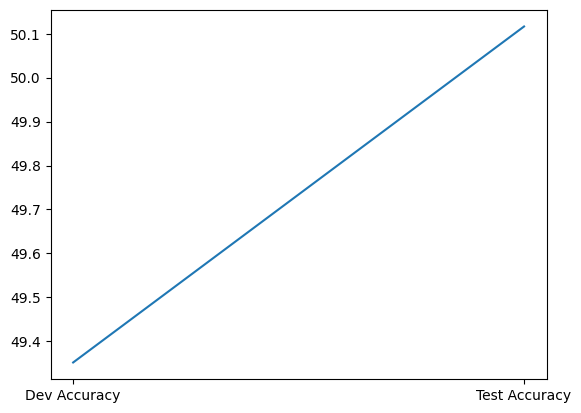

In [33]:
import seaborn as sns
acc=[49.3517356754496,50.116508334827024]
label=['Dev Accuracy','Test Accuracy']
sns.lineplot(data=None, x=label, y=acc)

**SVM Text classifier**

In [24]:
X_train,X_remaining, y_train, y_remaining= train_test_split(train_set['comment'],train_set['subreddit'],train_size=0.5,stratify=train_set['subreddit'])
X_test, X_dev, y_test, y_dev = train_test_split(X_remaining,y_remaining,test_size=0.3,stratify=y_remaining)
train_set=pd.concat([X_train,y_train],axis=1).reset_index(drop=True)
dev_set=pd.concat([X_dev,y_dev],axis=1).reset_index(drop=True)
test_set=pd.concat([X_test,y_test],axis=1).reset_index(drop=True)
print(f"Train set size:  ",train_set.size)
print(f"Dev set size:  ",dev_set.size)
print(f"Test set size:  ",test_set.size)

Train set size:   111578
Dev set size:   33474
Test set size:   78104


In [25]:
from sklearn import svm
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(word_dict)
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Dev_X_Tfidf = Tfidf_vect.transform(X_dev)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

**Accuracy on Dev Set**

In [26]:
from sklearn.metrics import accuracy_score
linear_svm= svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
linear_svm.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = linear_svm.predict(Dev_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_dev)*100)

SVM Accuracy Score ->  64.93397861026469


In [27]:
rbf_svm= svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
rbf_svm.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = rbf_svm.predict(Dev_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_dev)*100)

SVM Accuracy Score ->  48.01935830794049


**Accuracy on Test Set**

In [34]:
from sklearn.metrics import accuracy_score
linear_svm= svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
linear_svm.fit(Train_X_Tfidf,y_train)
# predict the labels on validation dataset
predictions_SVM = linear_svm.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  64.13243879954932


<Axes: >

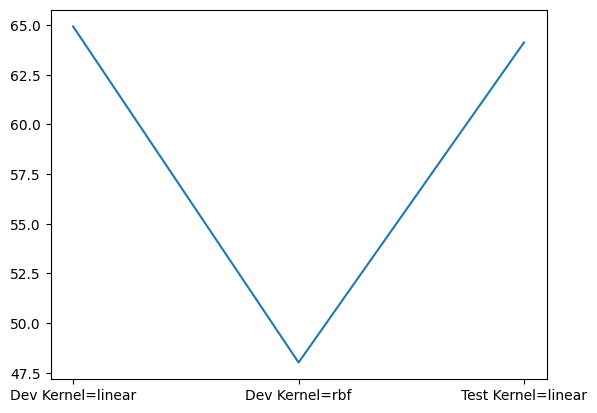

In [61]:
acc=[64.93397861026469,48.01935830794049,64.13243879954932]
label=['Dev Kernel=linear','Dev Kernel=rbf','Test Kernel=linear']
sns.lineplot(x=label,y=acc)

**Decision Tree Text classifier**

In [36]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
dc.fit(Train_X_Tfidf,y_train)
dev_dc=dc.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(dev_dc, y_dev)*100)

Accuracy of Dev set: 52.69761606022585


In [37]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dc.fit(Train_X_Tfidf,y_train)
dev_dc=dc.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(dev_dc, y_dev)*100)

Accuracy of Dev set: 55.12337933918863


In [38]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=100, min_samples_leaf=10)
dc.fit(Train_X_Tfidf,y_train)
dev_dc=dc.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(dev_dc, y_dev)*100)

Accuracy of Dev set: 57.08908406524466


In [39]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=500, min_samples_leaf=15)
dc.fit(Train_X_Tfidf,y_train)
dev_dc=dc.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(dev_dc, y_dev)*100)

Accuracy of Dev set: 58.22429348150804


In [40]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=500, min_samples_leaf=5)
dc.fit(Train_X_Tfidf,y_train)
dev_dc=dc.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(dev_dc, y_dev)*100)

Accuracy of Dev set: 56.22871482344506


In [48]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3000, min_samples_leaf=200)
dc.fit(Train_X_Tfidf,y_train)
dev_dc=dc.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(dev_dc, y_dev)*100)

Accuracy of Dev set: 59.41327597538388


**Test Accuracy**

In [49]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3000, min_samples_leaf=200)
dc.fit(Train_X_Tfidf,y_train)
test_dc=dc.predict(Test_X_Tfidf)
print("Accuracy of Test set:",metrics.accuracy_score(test_dc, y_test)*100)

Accuracy of Test set: 59.093004199528835


<Axes: >

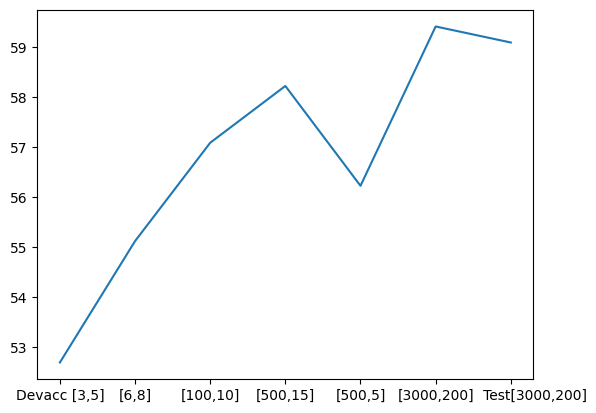

In [76]:
acc=[52.69761606022585,55.12337933918863,57.08908406524466,58.22429348150804,56.22871482344506,59.41327597538388,59.093004199528835]
label=['Devacc [3,5]','[6,8]','[100,10]','[500,15]','[500,5]','[3000,200]','           Test[3000,200]']
sns.lineplot(x=label,y=acc)

**Logistic Regression classifier**

**Accuracy of Dev set**

In [52]:
from sklearn import linear_model
lr_model= linear_model.LogisticRegression(max_iter=1000)  
lr_model.fit(Train_X_Tfidf,y_train)  
predictions_lr = lr_model.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(y_dev,predictions_lr)*100)

Accuracy of Dev set: 65.1430961343132


In [54]:
from sklearn import linear_model
lr_model= linear_model.LogisticRegression(max_iter=10000)  
lr_model.fit(Train_X_Tfidf,y_train)  
predictions_lr = lr_model.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(y_dev,predictions_lr)*100)

Accuracy of Dev set: 65.1430961343132


In [56]:
from sklearn import linear_model
lr_model= linear_model.LogisticRegression(max_iter=10000)  
lr_model.fit(Train_X_Tfidf,y_train)  
predictions_lr = lr_model.predict(Test_X_Tfidf)
print("Accuracy of Test set:",metrics.accuracy_score(y_test,predictions_lr)*100)

Accuracy of Test set: 64.40899313735532


<Axes: >

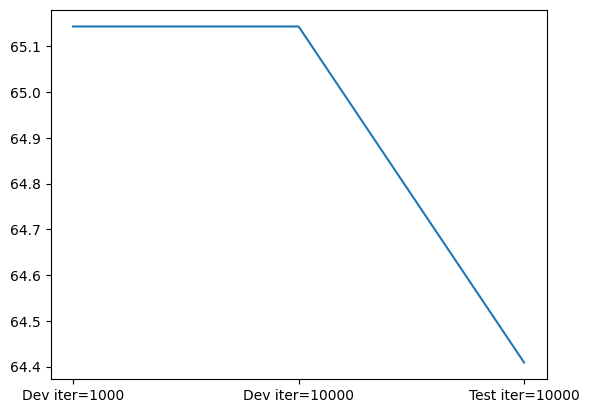

In [78]:
acc=[65.1430961343132,65.1430961343132,64.40899313735532]
labels=['Dev iter=1000','Dev iter=10000','Test iter=10000']
sns.lineplot(x=labels,y=acc)

**Random Forest classifier**

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(Train_X_Tfidf,y_train)
predictions_rf = model.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(y_dev,predictions_rf)*100)

Accuracy of Dev set: 53.52811137001853


In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
model.fit(Train_X_Tfidf,y_train)
predictions_rf = model.predict(Dev_X_Tfidf)
print("Accuracy of Dev set:",metrics.accuracy_score(y_dev,predictions_rf)*100)

Accuracy of Dev set: 53.74917846686981


**Test accuracy**

In [60]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
model.fit(Train_X_Tfidf,y_train)
predictions_rf = model.predict(Test_X_Tfidf)
print("Accuracy of Test set:",metrics.accuracy_score(y_test,predictions_rf)*100)

Accuracy of Test set: 53.44924715763597


<Axes: >

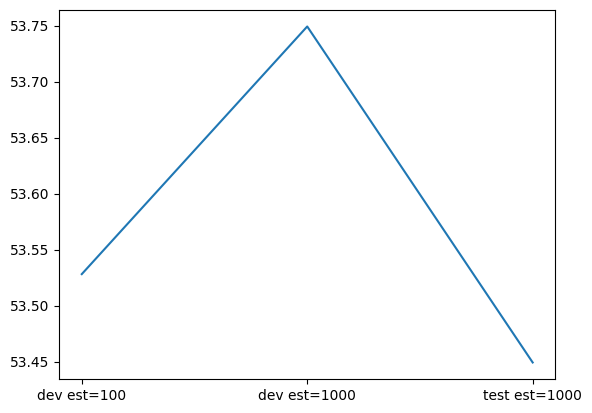

In [79]:
acc=[53.52811137001853,53.74917846686981,53.44924715763597]
labels=['dev est=100','dev est=1000','test est=1000']
sns.lineplot(x=labels,y=acc)

**Accuracies of all classifiers**

<Axes: >

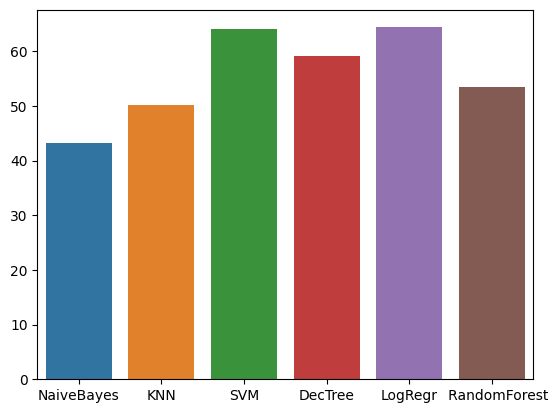

In [81]:
acc=[43.279091502682215,50.116508334827024,64.13243879954932,59.093004199528835,64.40899313735532,53.44924715763597]
labels=['NaiveBayes','KNN','SVM','DecTree','LogRegr','   RandomForest']
sns.barplot(x=labels,y=acc)